# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [11]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

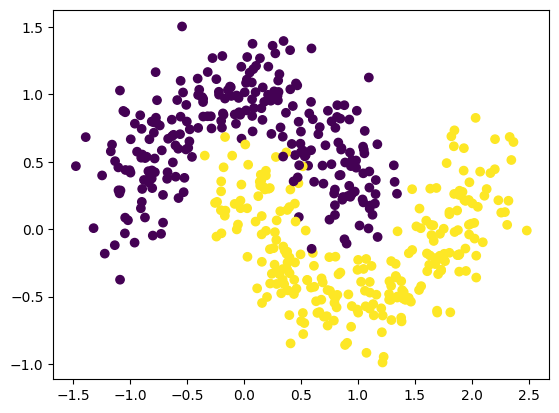

In [12]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [13]:
#! pip install mlxtend

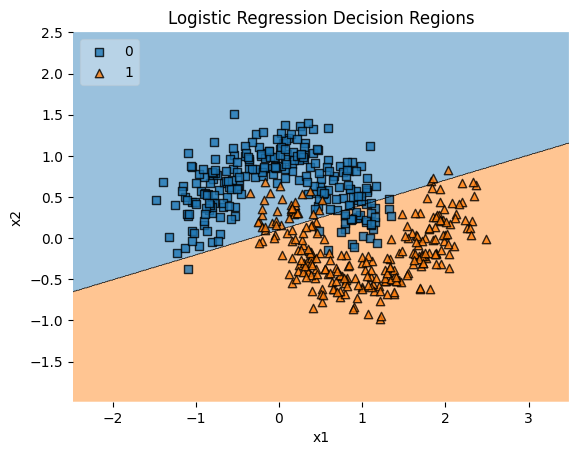

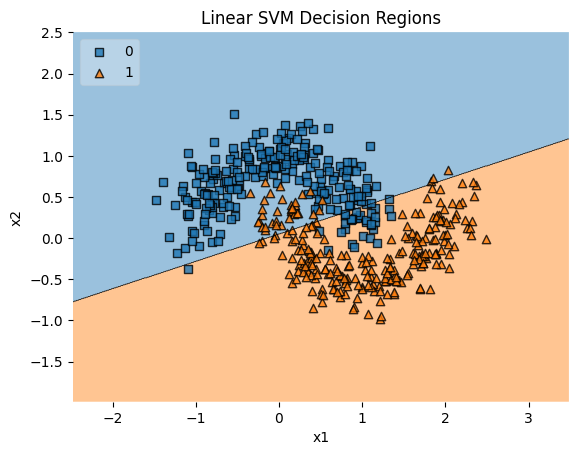

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Train logistic regression
lr = LogisticRegression()
lr.fit(moons_points, moons_labels)

# Train linear SVM
svm = SVC(kernel='linear')
svm.fit(moons_points, moons_labels)

# Plot decision regions
plot_decision_regions(moons_points, moons_labels, clf=lr, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Decision Regions')
plt.show()

plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Linear SVM Decision Regions')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

# Predict labels using logistic regression
lr_predictions = lr.predict(moons_points)
lr_accuracy = accuracy_score(moons_labels, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# Predict labels using linear SVM
svm_predictions = svm.predict(moons_points)
svm_accuracy = accuracy_score(moons_labels, svm_predictions)
print("Linear SVM Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.856
Linear SVM Accuracy: 0.858


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

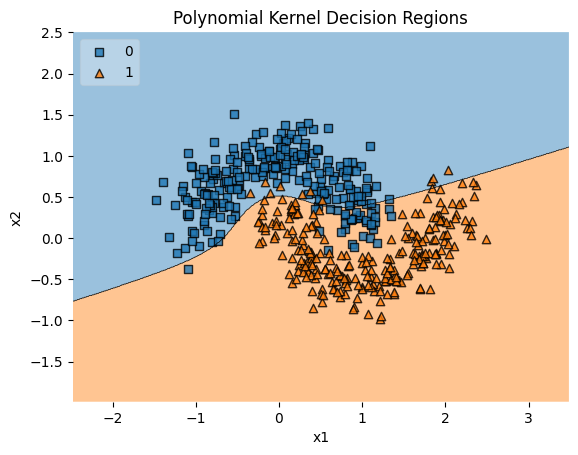

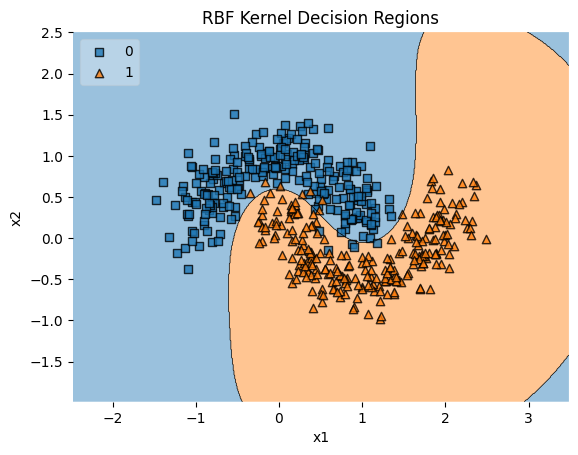

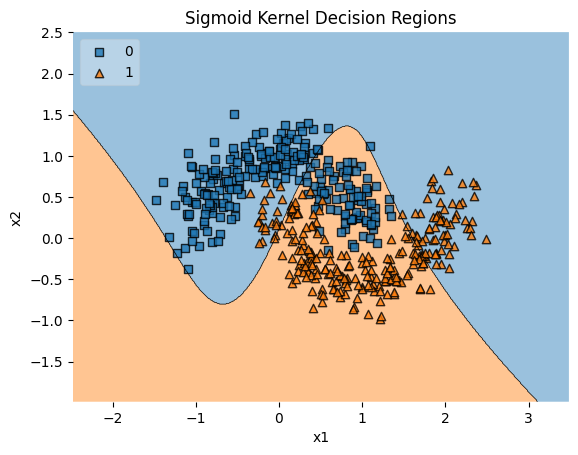

In [16]:
# Polynomial kernel
poly_kernel = SVC(kernel='poly', degree=3)
poly_kernel.fit(moons_points, moons_labels)
plot_decision_regions(moons_points, moons_labels, clf=poly_kernel, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Polynomial Kernel Decision Regions')
plt.show()

# RBF kernel
rbf_kernel = SVC(kernel='rbf')
rbf_kernel.fit(moons_points, moons_labels)
plot_decision_regions(moons_points, moons_labels, clf=rbf_kernel, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('RBF Kernel Decision Regions')
plt.show()

# Sigmoid kernel
sigmoid_kernel = SVC(kernel='sigmoid')
sigmoid_kernel.fit(moons_points, moons_labels)
plot_decision_regions(moons_points, moons_labels, clf=sigmoid_kernel, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sigmoid Kernel Decision Regions')
plt.show()


In [17]:
# Predict labels using polynomial kernel
poly_predictions = poly_kernel.predict(moons_points)
poly_accuracy = accuracy_score(moons_labels, poly_predictions)
print("Polynomial Kernel Accuracy:", poly_accuracy)

# Predict labels using RBF kernel
rbf_predictions = rbf_kernel.predict(moons_points)
rbf_accuracy = accuracy_score(moons_labels, rbf_predictions)
print("RBF Kernel Accuracy:", rbf_accuracy)

# Predict labels using sigmoid kernel
sigmoid_predictions = sigmoid_kernel.predict(moons_points)
sigmoid_accuracy = accuracy_score(moons_labels, sigmoid_predictions)
print("Sigmoid Kernel Accuracy:", sigmoid_accuracy)


Polynomial Kernel Accuracy: 0.906
RBF Kernel Accuracy: 0.974
Sigmoid Kernel Accuracy: 0.648


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

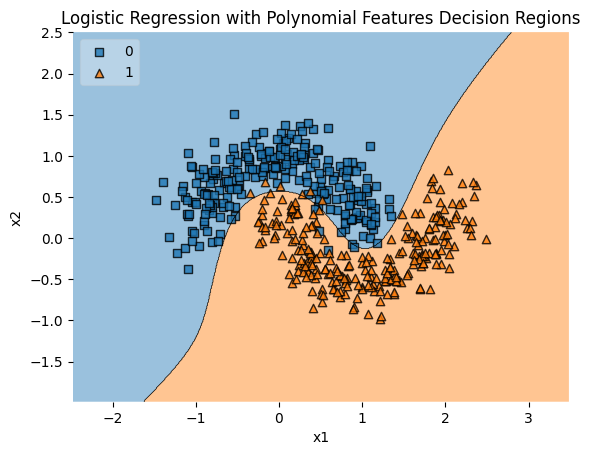

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline with PolynomialFeatures, StandardScaler, and LogisticRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=7)),
    #('scaler', StandardScaler()),
    ('model', LogisticRegression())
])


# Fit the model with the training data
pipeline.fit(moons_points, moons_labels)

# Plot the decision regions using plot_decision_regions
plot_decision_regions(moons_points, moons_labels, clf=pipeline, legend=2)


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression with Polynomial Features Decision Regions')
plt.show()


In [19]:
# Predict labels using logistic regression with polynomial features
pipeline_predictions = pipeline.predict(moons_points)
pipeline_accuracy = accuracy_score(moons_labels, pipeline_predictions)
print("Logistic Regression with Polynomial Features Accuracy:", pipeline_accuracy)


Logistic Regression with Polynomial Features Accuracy: 0.978


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

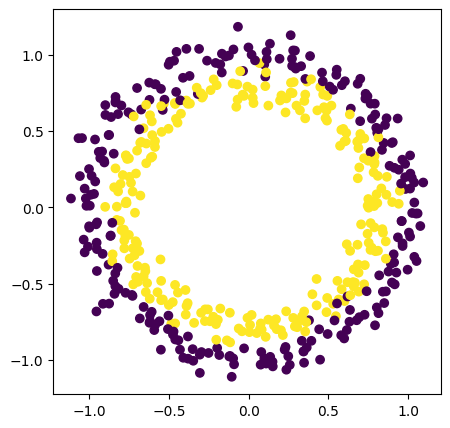

In [20]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)
plt.show()

And even more:

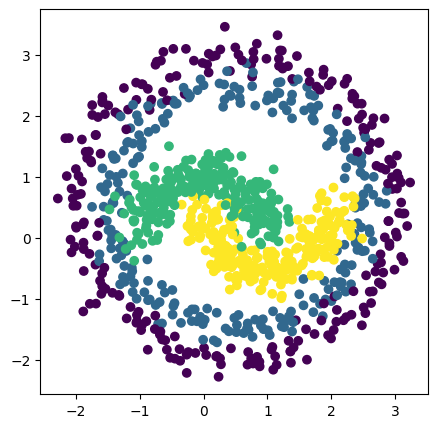

In [21]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [22]:
def plot_regions(X, Y, clf, acc, label):
    plot_decision_regions(X, Y, clf=clf, legend=2, markers='o'*len(np.unique(Y)))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(label + f' (Acc: {np.around(acc, 3)})')
    plt.show()

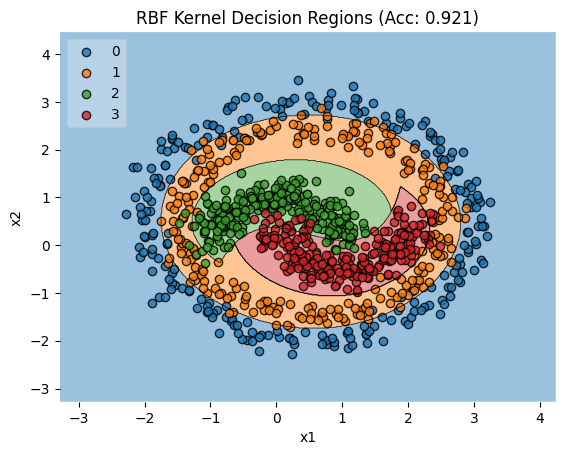

In [23]:
# RBF kernel
rbf_kernel = SVC(kernel='rbf')
rbf_kernel.fit(points, labels)
RBF_accuracy = accuracy_score(labels, rbf_kernel.predict(points))
plot_regions(points, labels, rbf_kernel, RBF_accuracy, 'RBF Kernel Decision Regions')

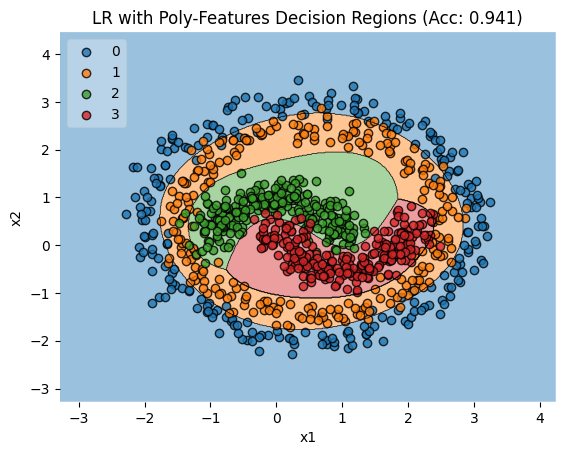

In [28]:
# Create a pipeline with PolynomialFeatures, StandardScaler, and LogisticRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    #('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=5000))
])


# Fit the model with the training data
pipeline.fit(points, labels)
pipeline_accuracy = accuracy_score(labels, pipeline.predict(points))
plot_regions(points, labels, pipeline, pipeline_accuracy, 'LR with Poly-Features Decision Regions')



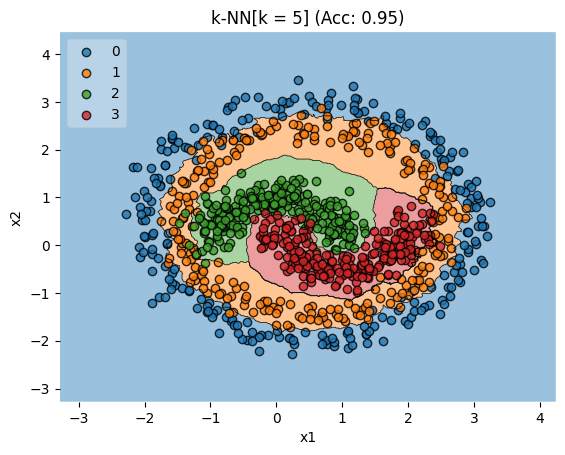

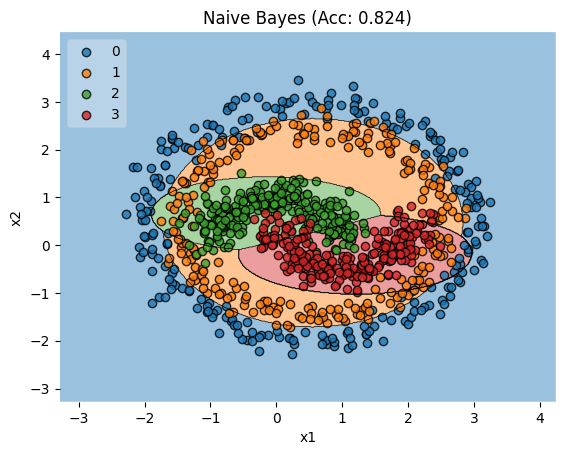

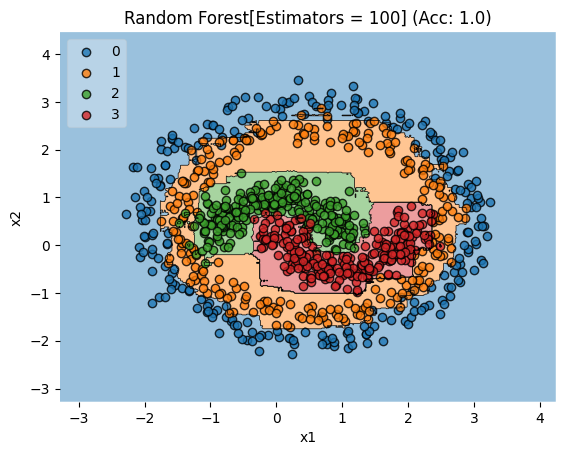

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# 1. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn.fit(points, labels)
knn_accuracy = accuracy_score(labels, knn.predict(points))
plot_regions(points, labels, knn, knn_accuracy, 'k-NN[k = 5]')


# 2. Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(points, labels)
gnb_accuracy = accuracy_score(labels, gnb.predict(points))
plot_regions(points, labels, gnb, gnb_accuracy, 'Naive Bayes')


# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(points, labels)
rf_accuracy = accuracy_score(labels, rf.predict(points))
plot_regions(points, labels, rf, rf_accuracy, 'Random Forest[Estimators = 100]')